# Visualization of Kernel Density Estimation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

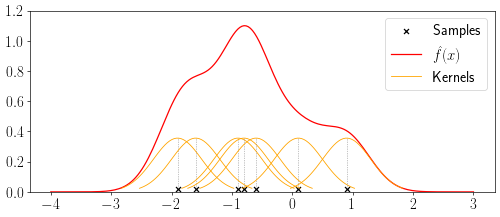

In [51]:
samples = [-1.9, -1.6, -0.9, -0.8, -0.6, 0.1, 0.9]
h = 0.4
nh = len(samples) * h
x = np.linspace(-4, 3, 200)
y = np.array([sum([norm.pdf(xval, loc=sample, scale=h) for sample in samples]) for xval in x]) / nh

plt.rcParams['text.usetex'] = True
plt.rcParams.update({"font.size": 18})
plt.figure(figsize=(10, 4), dpi=60)
# draw samples
plt.scatter(samples, np.zeros_like(samples) + 0.02, marker="x", color="black", label="Samples")
# draw density estimation
plt.plot(x, y, color="red", label=r"$\hat{f}(x)$")
# draw individual samples
for i, sample in enumerate(samples):
    xmin = norm.ppf(0.01, loc=sample, scale=h)
    xmax = norm.ppf(0.99, loc=sample, scale=h)
    x = np.linspace(xmin, xmax, 50)
    plt.plot(x, norm.pdf(x, loc=sample, scale=h) / nh, lw=1, color="orange", label="Kernels" if i == 0 else None)
    plt.plot([sample, sample], [0, norm.pdf(sample, loc=sample, scale=h) / nh], color="gray", ls="dotted", lw=0.8)
plt.legend()
plt.ylim((0.0, 1.2))
plt.savefig(f"kde.png", bbox_inches="tight")
plt.savefig(f"kde.pdf", bbox_inches="tight")
plt.show()